<a href="https://colab.research.google.com/github/Chandrika-04/python_programming/blob/main/Myproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display

In [ ]:
# Add environment Packages paths to conda
import os, sys
# env_name = "food_review"
# sys.path.append(f"C:\\Environments\\{env_name}\\lib\\site-packages\\")

import pandas as pd
import numpy as np

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package

# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
%%time
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

CPU times: user 388 ms, sys: 125 ms, total: 513 ms
Wall time: 554 ms


<timed exec>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0


In [ ]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
411048,NaN,NaN,NaN,NaN,NaN,NaN
411049,NaN,NaN,NaN,NaN,NaN,NaN
411050,NaN,NaN,NaN,NaN,NaN,NaN
411051,NaN,NaN,NaN,NaN,NaN,NaN
411052,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
f"{df.shape[0]:,} Review"

'411,053 Review'

In [ ]:
cols = ['Reviews', 'Rating']
df_text = df[cols].copy()
df_text.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5.0
1,"nice phone, nice up grade from my pantach revu...",4.0
2,Very pleased,5.0
3,It works good but it goes slow sometimes but i...,4.0
4,Great phone to replace my lost phone. The only...,4.0


In [ ]:
df_text.duplicated().sum()

394725

In [ ]:
df_text.drop_duplicates(inplace=True)
df_text.reset_index(drop=True,inplace=True)

In [ ]:
df_text.duplicated().sum()

0

In [ ]:
df_text.tail()

,Reviews,Rating
16323,Exceeded my expectations like new condition wa...,5.0
16324,"Good evening, I write to you this time to info...",5.0
16325,Phone had some issues upon arrival such as lac...,2.0
16326,I like the phone condition nice shape....,5.0
16327,NaN,NaN


In [ ]:
df_text['target'] = [0 if i <3  else 1 for i in df_text.Rating ]

In [ ]:
df_text.head()

,Reviews,Rating,target
0,I feel so LUCKY to have found this used (phone...,5.0,1
1,"nice phone, nice up grade from my pantach revu...",4.0,1
2,Very pleased,5.0,1
3,It works good but it goes slow sometimes but i...,4.0,1
4,Great phone to replace my lost phone. The only...,4.0,1


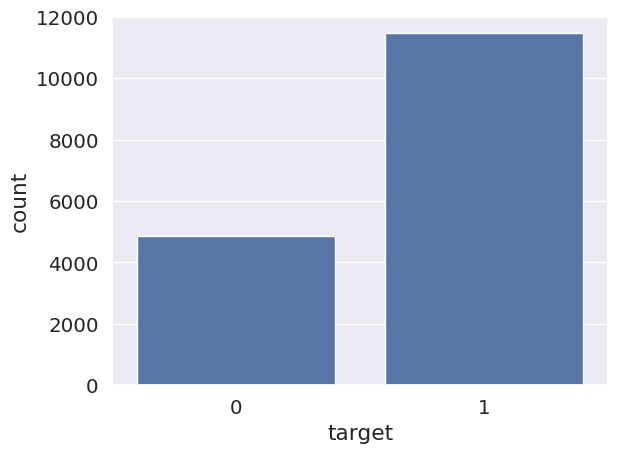

In [ ]:
sns.countplot(data=df_text,x='target')
plt.show()

In [ ]:
# Sample from positive reviews Same number of negative reviews

#NEG_N it will store the size of negative reviews or zeros on the data frame
NEG_N = df_text.target.value_counts()[0]
#so, df_pos contains the positive reviews text or text with value equals to 1 in target
df_pos = df_text[df_text['target'] == 1]['Reviews'].sample(NEG_N, replace=False)
#now we will make a new dataframe where the size of positive reviews is same as the size of negative reviews
df_text_balanced = pd.concat([df_text.iloc[df_pos.index], df_text[df_text.target == 0]])
df_text_balanced.reset_index(drop=True,inplace=True)

(0.0, 1500.0)

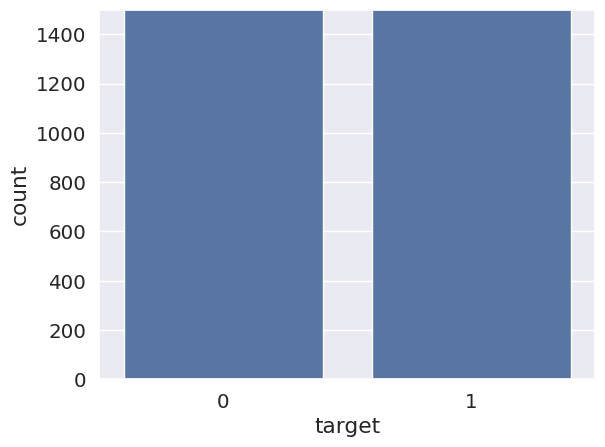

In [ ]:
sns.countplot(data=df_text_balanced,x='target')
plt.ylim(0,1500)

In [ ]:
stop_words = list(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer= WordNetLemmatizer()

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Removing every not from stop words
stop_words.remove('not')
for i in stop_words:
    if "n't" or "n'" in i:
        stop_words.remove(i)

In [ ]:
def cleaning_text(Text):
    # Removing Stop Words
    Text = [i for i in str(Text).split() if i not in stop_words]

    # Removing special characters
    Text = [re.sub('[^A-Za-z0-9]+', '', str(i)) for i in Text]

    # Lemmatizing each word
    Text = [lemmatizer.lemmatize(y) for y in Text]

    # Stemming each word
    Text = [stemmer.stem(y) for y in Text]

    # Joining the words back into a single string
    Cleaned_Text = " ".join(Text)

    # Remove numbers
    Cleaned_Text = ''.join([i for i in Cleaned_Text if not i.isdigit()])

    # Return the cleaned text
    return Cleaned_Text

# Applying the cleaning function to the 'Reviews' column instead of 'Text'
df_text_balanced['Reviews'] = df_text_balanced['Reviews'].apply(lambda review: cleaning_text(review))

In [ ]:
X = df_text_balanced.iloc[:, 0].values
y = df_text_balanced.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
## TFIDF embedding for the Description
vectorizer = TfidfVectorizer() ## Write your code here
# fit on training (such vectorizer will be saved for deployment)
vectorizer.fit(X_train)
# transform on training data
X_train = vectorizer.fit_transform(X_train)
# transform on testing data
X_test = vectorizer.transform(X_test)

In [ ]:
X_train

<6802x8065 sparse matrix of type '<class 'numpy.float64'>'
	with 148838 stored elements in Compressed Sparse Row format>

In [ ]:
X_train.shape,X_test.shape

((6802, 8065), (2916, 8065))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## initialize your Model
clf = LogisticRegression(solver='liblinear')

# Fit your Model on the Training Dataset
clf.fit(X_train, y_train)

# Predict on Test data
preds =  clf.predict(X_test)

# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 89.03%


In [ ]:
def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = cleaning_text(review)
    # Embed review using tf-idf vectorizer
    embedding = vectorizer.transform([review_c])
    # Predict using your model
def raw_test(review, model, vectorizer):
    # Clean Review
    review_c = cleaning_text(review)
    # Embed review using tf-idf vectorizer
    embedding = vectorizer.transform([review_c])
    # Predict using your model
    prediction = model.predict(embedding)
    # Return the Sentiment Prediction
    return "Positive" if prediction == 1 else "Negative"

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1436
           1       0.91      0.87      0.89      1480

    accuracy                           0.89      2916
   macro avg       0.89      0.89      0.89      2916
weighted avg       0.89      0.89      0.89      2916



In [ ]:
test_reviews = [
    "This phone is amazing! I love it.",  # Clearly positive
    "This is the worst phone I have ever used.",  # Clearly negative
    "The phone is okay, nothing special.",  # Neutral
    "I'm not sure how I feel about this phone. It has some good features, but also some bad ones.",  # Mixed
    "This phone is totally lit! I'm super hyped about it.",  # Slang (positive)
    "The phone is garbage, I hate it.", # Clearly negative with slang
    "It does the job, I suppose.", # Neutral
    "The camera is good, but the battery is terrible." # Mixed
]

for review in test_reviews:
    prediction = raw_test(review, clf, vectorizer)
    print(f"Review: '{review}'")
    print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")


Review: 'This phone is amazing! I love it.'
Prediction: Positive
Review: 'This is the worst phone I have ever used.'
Prediction: Negative
Review: 'The phone is okay, nothing special.'
Prediction: Positive
Review: 'I'm not sure how I feel about this phone. It has some good features, but also some bad ones.'
Prediction: Positive
Review: 'This phone is totally lit! I'm super hyped about it.'
Prediction: Negative
Review: 'The phone is garbage, I hate it.'
Prediction: Negative
Review: 'It does the job, I suppose.'
Prediction: Negative
Review: 'The camera is good, but the battery is terrible.'
Prediction: Negative


In [ ]:
# 2. Inspect Cleaning
print("\n--- Inspecting Cleaning ---")
test_reviews_for_cleaning = [
    "This phone is amazing! I love it.",
    "This is the worst phone I have ever used. 100% garbage!",
    "The phone is okay, nothing special.",
]

for review in test_reviews_for_cleaning:
    cleaned_review = cleaning_text(review)
    print(f"Original: '{review}'")
    print(f"Cleaned: '{cleaned_review}'")



--- Inspecting Cleaning ---
Original: 'This phone is amazing! I love it.'
Cleaned: 'this phone amaz i love it'
Original: 'This is the worst phone I have ever used. 100% garbage!'
Cleaned: 'this the worst phone i have ever use  garbag'
Original: 'The phone is okay, nothing special.'
Cleaned: 'the phone okay noth special'


In [ ]:
#3. Model evaluation
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 89.03%


In [ ]:
 #4. Evaluate Other Models
# Evaluate Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)
rf_acc = accuracy_score(rf_preds, y_test)
print(f"\nRandom Forest Accuracy = {round(rf_acc*100,2)}%")
print(classification_report(y_test, rf_preds))


Random Forest Accuracy = 87.14%
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1436
           1       0.90      0.84      0.87      1480

    accuracy                           0.87      2916
   macro avg       0.87      0.87      0.87      2916
weighted avg       0.87      0.87      0.87      2916

